##What is Machine learning?  
ML is a subdomain of computer science  that focus on Algorithm which helps a computer learn from data without explicet programing



What is explicit Programing?  
When we need to teach or code to tell machine what to do is know as explicit programing ,but in machine learning  it learn on it own through dataset 

AI vs ML vs DS

AI-Artificial intelligence is an area of computer science, where the goal is to enalbe computer and machine to perform human-like tasks and simulate human bhehavior.

ML- Machine learning is subset of AI that tries to solve a specific problen and make predictionds using data

DS- Data science is field that attempts to find patterns and draw insights from data (might use ML)


Type of Machine learning?  

1.Supervised learning- Uses labeeled input(meaning the input has a corresponding output label) to train models and learn output(we have give input correct othervise it will give error we have to give input)

2.Unsupervised Learning- Uses unlabeled data to learn about pattern in data (we dont need to give input as it understand by it self)

3.Reinforcement Learning- agent learning in interactive envirnment based on rewards and penalties also learn from feedback (example baby learn to speak and act accordng to envoirnment and we traing dog it dont no what is good and bad )


Input(features)----Model-----output(prediction)
This is how ML model works

Qualitative-  categorical data(finite number of categories or group)(eg-category or groups) (male ,femail)(location,country etc)(NOMINAL DATA-no inherent order)   
There is also a term known as ONE-HOT ENCODING- which mean take (0,0,0,1)(0,0,1,0)      
Quantitative- Numerical valued data (could be discrete or contnuous)(continus like from 1 to continue)(Discreat like randoms)

Two Type of classification      
1.Binary(yes or no, 0 or 1)-positive/negative,cat/dog,spam/not spam only 2 factor consider (predicting between two things)    

2.Muticlass Classification-cat/dog/lizard/dolphine,orande,apple,mango,plant species, --means multiple attribute(predicting between 2 or more things)

Supervised learning tasks    
1.classification 
2.Regression

X=Is feature data,   y=label data or last column or output we want

one problen come when we use model is we create a model with history dataset but what about future data set so we need use 3 type of data set given below

Supervised learning dataset  
1.Training dataset= 60%   or 80%             
2.validation dataset=20%  or 10%                      
3.testing dataset=20%    or 10%                          
there based on the accuracy of the model we take any percentage to fit model


Training data (be like)              
Training set -- model ---- output data + original data (comparing both the data difference and make adjusment with output data) this methiod is known as loss                      

Validation set (be like)                    
Validation set used as reality check during/after training to ensure model can handle unseen data (this step is after traing data)
             
which model to chose after all this eg=         
model A = loss=1.3           
model B= loss=1.5 (worse dont chose this model bcz high loss)   
model C=loss=0.5 (it is best model bcz the loss is less)   
Model D=loss=0.9




Loss is the difference betwen (Loss=prediction value - label value )                   
As loss decreaase it increase the performance better

After that we take model C     
Test set used to check how generalizable the final chosen model is (FINAL REPORT PERFORMANCE) after output choosing model C                   


Loss=-1/N*sum(y real * log(y predict) + (1-y real) * log((1-y predict)))

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler   #take more from less class keep sampling to increase data set in x axit to (fit or balance the dataset x and y)
#imblearn is use to genrate randome data to fit or balance the model

In [6]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsyn',' fM3Long',' fM3Trans','fAlpha',' fDist','class']
df=pd.read_csv("magic04.data",names=cols) #as u can see there is data but no colum define so we add column given above
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsyn,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df['class'].unique() #g= gamma(signal), h=hadron(background)

array(['g', 'h'], dtype=object)

In [8]:
#now in this step we are converting g and h with 0 and 1
df['class']=(df['class']=='g').astype(int)

1.For predicting model we need some feature point in data set and with the help of feature we will pridicting class means (either it hadron or gamma)    
2.So all the column name is feature except class coumn class we have to predict by traing model

we have 10 different feature and one class is predictable factor


In [9]:
df.head()#as u can see g and h change to 0 and 1

,fLength,fWidth,fSize,fConc,fConc1,fAsyn,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


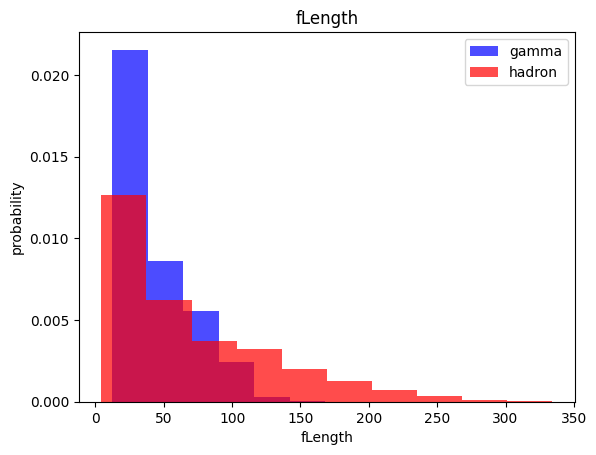

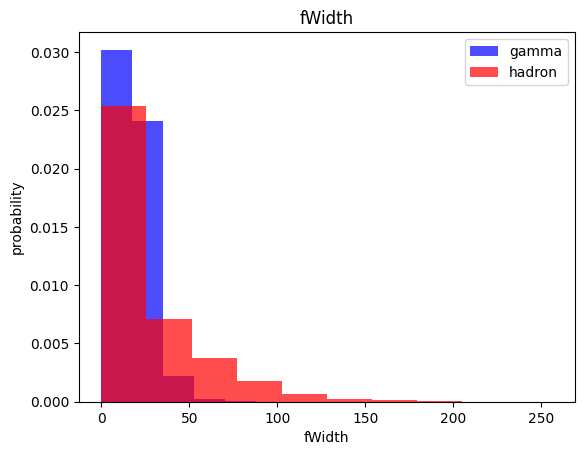

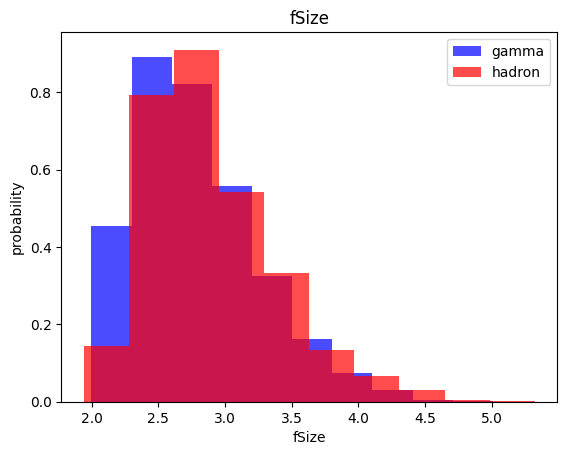

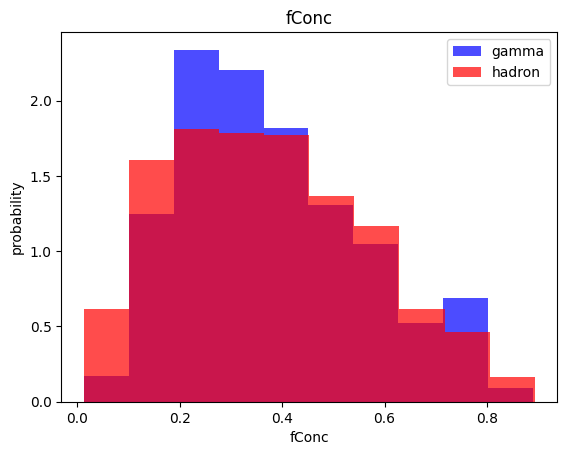

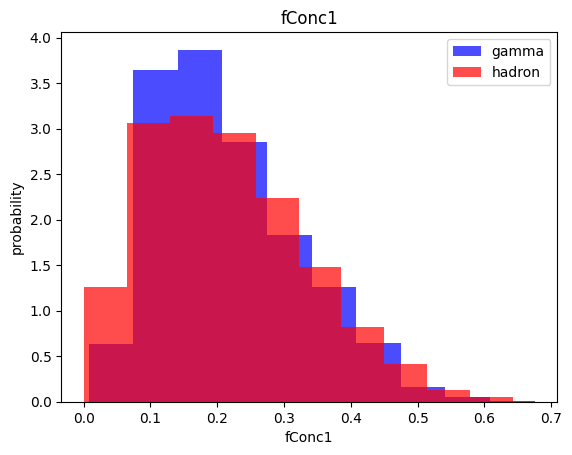

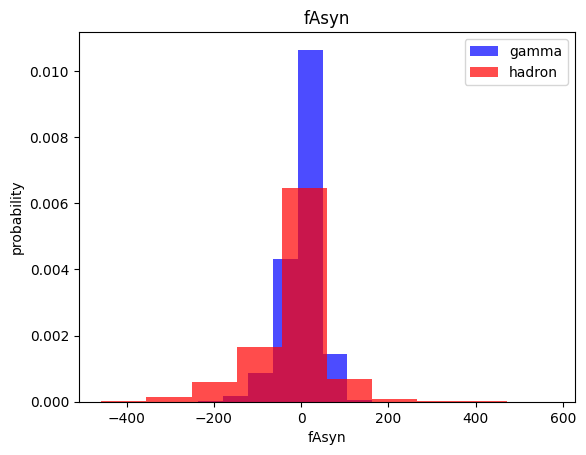

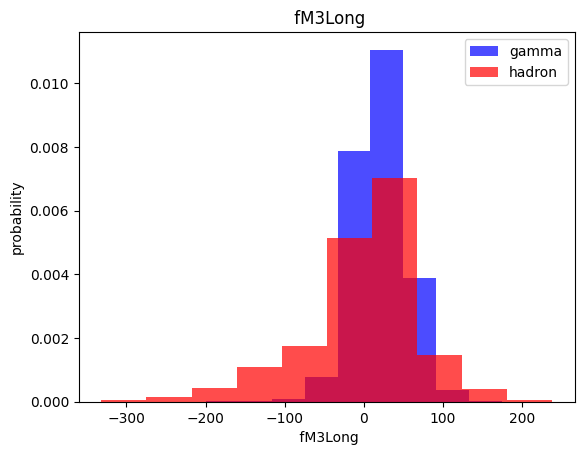

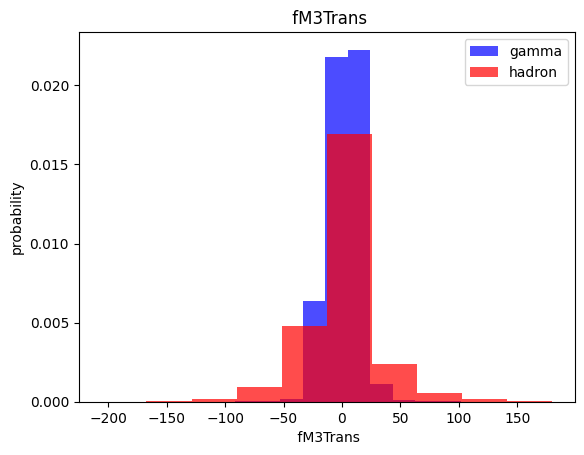

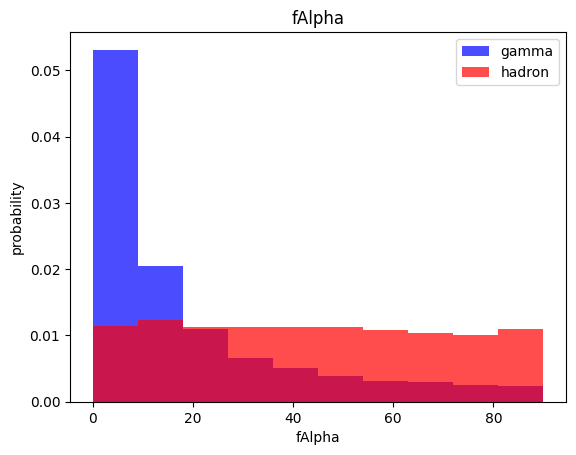

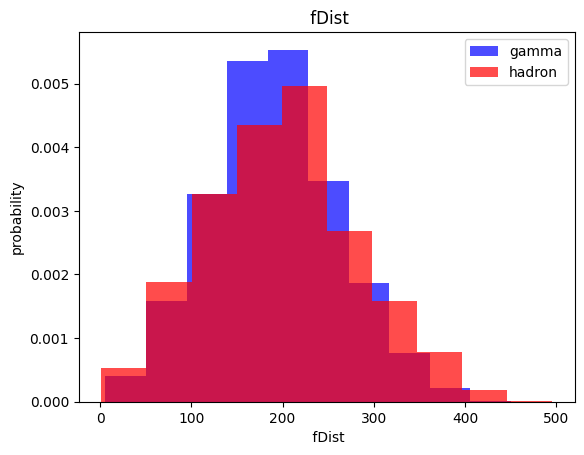

In [10]:
for label in cols[:-1]: #semicolan means upto last item
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('probability') #giving y axis
    plt.xlabel(label) #giving x axis 
    plt.legend()
    plt.show() #this line mean show the graph 



Train, validation, test datasets

In [32]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
#in this line we split data in valid from 60 to 80 % of dataset in length and 80 to 100% we use for testing in total no of line dataset

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


We split data           
1 to 60%=train            
60 to 80%=  valid              
80 to 100%= test of length (total no. of row )             
we compare the output of 80 to 100% and compare with original data if our output is same as original data then is best fit model (original data means label data last column of 0 and 1)

In [28]:
#label is the last things (stack means hodizontal) this is fitting model step train data
def scale_dataset(dataframe, oversample=False):
    x=dataframe[dataframe.columns[:-1]].values #[:-1]= this mean we using x axis from statrt to -1 coumn for train or valid
    y=dataframe[dataframe.columns[-1]].values#[-1]= this line means we using last column means label data

    scaler=StandardScaler() #import library sklearn
    x=scaler.fit_transform(x)# this line means fit and transforn x axis

    if oversample: #ros means random over sample
        ros=RandomOverSampler()  #this oversample mean adding sample to dataset
        x,y=ros.fit_resample(x,y)
        
    data=np.hstack((x,np.reshape(y,(-1,1)))) #this line means arrange in horizontal (x is 2 dimendtional and y is 1 dimenstinal)bcz it only has label data

    return data,x,y


In [29]:
print(len(train[train['class']==1]))#gamma this is for this is use to check the no of gamma content in data
print(len(train[train['class']==0]))#hadron this is for check no of hadron in data

7392
4020


Training data

In [30]:
train,x_train,y_train=scale_dataset(train,oversample=True)  

In [15]:
len(y_train) #after using random data imblearn library we see that it git increses the data length means row

14738

In [21]:
sum(y_train==1)# as u can see no. gaama means 1 

7369

In [19]:
sum(y_train==0)#as u can see no of hadron means 0 

7369

Now both r balance gamma and hadrom 1 and 0 = 7408

In [33]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)
test,x_test,y_test=scale_dataset(test,oversample=False)  #keep in mind if error show then run spliting code or blocks 

Till now our data is properly formated

We use packeges bcz we dont have to manually code so that no erroe occur it will be slow and bucks so it better to use packages

Now we are using model like (K-nearest neighbours) KNN
length or distances between the x axis and y axis through point 

KNN(K - Near nebhour)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [36]:
knn_model=KNeighborsClassifier(n_neighbors=5) #using knn model
knn_model.fit(x_train,y_train)#this line is use to train model

KNeighborsClassifier()

In [37]:
y_pred=knn_model.predict(x_test) #this line will give output of label data to compare with original data

In [38]:
y_pred #predicted value after code

array([1, 0, 0, ..., 0, 0, 0])

In [39]:
y_test #Truth vale or original value given in dataset  we compare both y_predict and y_test

array([1, 0, 0, ..., 1, 1, 0])

In [40]:
print (classification_report  (y_test, y_pred)) #this is diffence report of predict and actual report value 
# as u can see the accuracy is 0.81 means 81% means (how many do we get right and how many are total in dataset )
#formula= value get/ total value eg- 80/100*100=80%

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1347
           1       0.85      0.87      0.86      2457

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Till Here we have completed K-near nabhour KNN Model

We have used (K-Near nabhour) and now we will be using (Naive Bayes) model 

In [41]:
from sklearn.naive_bayes import GaussianNB  #importing naive bayes model

In [42]:
nb_model= GaussianNB()
nb_model= nb_model.fit(x_train,y_train)

In [43]:
y_pred= nb_model.predict(x_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1347
           1       0.73      0.89      0.80      2457

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



Four Basic step to implement Model    
1.import library that related to model (eg - sklearn)    
2.Fit model (train , test)    
3.predic model code (eg - x_test)    
4.print classification report (see accuracy)   

As you can see above our navel bayes giving less accouracy and precision is also not so good as compare to k near nabhour      
LOGISTIC REGRESSION      
Now we will use logistic regression and see what will be accuracy as compare to other 2 model

In [45]:
from sklearn.linear_model import LogisticRegression
#Sklearn is mostelt used for implemting model (eg- navel baise, regression , svm etc)

In [46]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [47]:
y_pred= lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1347
           1       0.84      0.81      0.82      2457

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Accuracy 
KNN model = 82% 
Navel Bayes model = 72%
Linerregresssion model = 78% 

Now we are using SVM  

In [48]:
#SVM
from sklearn.svm import SVC


In [49]:
#fitting model
svm_model= SVC()
svm_model= svm_model.fit(x_train, y_train)

In [50]:
#predict
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1347
           1       0.89      0.90      0.89      2457

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



As u can see above it has high accuracy among all 3 model accuracy=85%

NEURAL NETWORK

We are using Tensor flow in neural network to avoid mistack and error free

Tensor Flow = opensource library help to develop and train ML Model

In [51]:
import tensorflow as tf

In [52]:
nn_model= tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
                 metrics=['accuracy']) 
#giving loss factor and accuracy


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# def plot_loss(history): #this define function is for loss 
#     plt.plot(history.history['loss'],label='loss')
#     plt.plot(history.history['val_loss'],label='val_loss')
#     plt.xlabel('Epoch') #epoch means trainig cycle
#     #nural networkwork on history data
#     plt.ylabel('Binary crossentropy') #binary= loss factor
#     plt.legend()
#     plt.grid(True) #ALWay write true or false in capital first letter
#     plt.show()

# def plot_accuracy(history): #this def function is for accuracy 
#     plt.plot(history.history['accuracy'],label='accuracy')
#     plt.plot(history.history['val_accuracy'],label='val_accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [54]:
# nn_model=tf.keras.Sequential([   #we doinging modfy to get more accuracy so we mody in accuacy section code
#     tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)), #in this line we chance 32 to now 64 to check the chnage 
#   # tf.keras.layers.Dropout(),  check that it should be comma at end of line not dot 
#     tf.keras.layers.Dense(32,activation='relu'),
#     tf.keras.layers.Dense(1,activation='sigmoid') #we can also change value like 64,32,1 in activation 
# ])
# nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
#                  metrics=['accuracy'])


In [56]:
history=nn_model.fit(
    x_train,y_train,epochs=100,batch_size=32,validation_split=0.2
) # verbose=0 means ingore outupt bcz it annoing

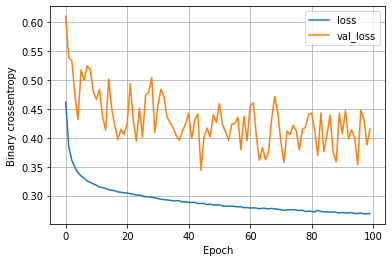

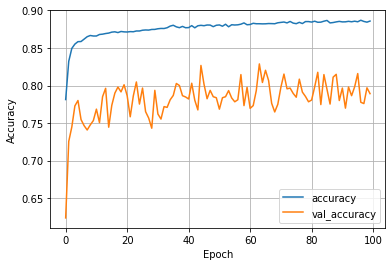

In [ ]:
# plot_loss(history)
# plot_accuracy(history)

This is modified line of code given below to just check output  
Above 3 line should be ignore directly used below line for new expriment

In [ ]:
def plot_history(history): #this define function is for loss 
    fig,(ax1,ax2)= plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch') #epoch means trainig cycle
    #nural networkwork on history data
    ax1.set_ylabel('Binary crossentropy') #binary= loss factor
    ax1.grid(True) #ALWay write true or false in capital first letter
    


    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

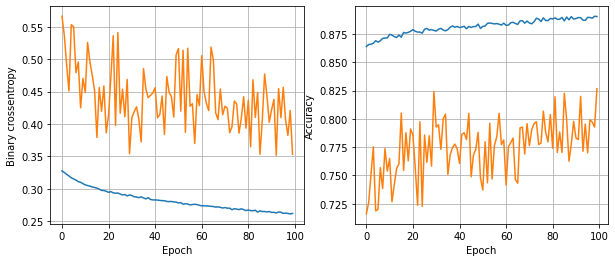

In [ ]:
plot_history(history)

In [ ]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)), #giving ranrom select of node 
        tf.keras.layers.Dropout(dropout_prob), #extra dropout line , dropout prevent from overfitting
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob), #extra droupout line
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                 metrics=['accuracy'])
    history=nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
    )
    return nn_model, history

In [ ]:
least_val_loss= float('inf')   #this command will take lot of time 
least_loss_model= None
epochs=100
for num_nodes in[16,32,64]:
    for  dropout_prob in[0,0.2]:
        for lr in [0.01,0.005,0.001]: #lr = Learning rate
            for batch_size in [32,64,128]:
                print(f'{num_nodes}nodes,dropout{dropout_prob}, lr{lr},batch size{batch_size}')
                model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss=model.evaluate(x_valid,y_valid)[0]
                if val_loss<least_val_loss:
                    least_val_loss=val_loss
                    least_loss_model=model

SyntaxError: invalid syntax (3120521903.py, line 14)

In [ ]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred> 0.5).astype(int).reshape(-1,)


119/119 [==============================] - 1s 3ms/step


In [ ]:
print(classification_report(y_test,y_pred))
# Last step of nural netwok 
# finish Neural network

NameError: name 'classification_report' is not defined

Now we will using linear regression model   
LINEAR REGRESSSION

1.Mean absolute error  
2.Mean Square error  
3.Root Mean Square errror   
4.coff of determination   